# Kaggle - Porte Seguro Safe Driver Prediction - Perfomance Improvement 1
**Author: Chris Shin**

In this notebook, we are going to try to improve our baseline model by performing additional feature engineering and model optimization

# Additional Feature Engineering

We use all the given features. What we can try to make a better model is to think about derived features that might be helpful to the models.

In [9]:
import pandas as pd
pd.options.display.max_columns = None

train = pd.read_csv('./data/train.csv', index_col='id')
test = pd.read_csv('./data/test.csv', index_col='id')
submission = pd.read_csv('./data/sample_submission.csv', index_col='id')

# Back to EDA

In [14]:
ind_data = train[[feature for feature in train.columns if 'ind' in feature]]

In [16]:
ind_data['target'] = train['target']

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_22980\165645741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_data['target'] = train['target']


In [17]:
ind_data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,target
id,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0
9,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0
13,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0
16,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0
17,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0


In [30]:
ind_data[ind_data['target'] == 1]

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,target
id,,,,,,,,,,,,,,,,,,,
28,1,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,1
64,0,1,2,1,0,1,0,0,0,0,0,0,0,0,8,1,0,0,1
84,0,2,0,1,4,1,0,0,0,0,0,0,0,0,8,1,0,0,1
107,2,1,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,1
110,5,2,1,0,0,0,0,1,0,0,0,0,0,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487473,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,1
1487566,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,1
1487716,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,1


In [27]:
ind_bin_cols = [col for col in ind_data.columns if 'bin' in col]
# ind_bin_cols.append('target')

In [28]:
ind_bin_data = ind_data[ind_bin_cols]

In [29]:
ind_bin_data.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin
id,,,,,,,,,,,
7,0,1,0,0,0,0,0,0,0,1,0
9,0,0,1,0,0,0,0,0,0,0,1
13,0,0,1,0,0,0,0,0,1,0,0
16,1,0,0,0,0,0,0,0,1,0,0
17,1,0,0,0,0,0,0,0,1,0,0


In [32]:
ind_bin_data['bin_sum'] = ind_bin_data[ind_bin_cols].sum(axis=1)

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_22980\417865251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_bin_data['bin_sum'] = ind_bin_data[ind_bin_cols].sum(axis=1)


In [34]:
ind_bin_data['target'] = train['target']

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_22980\2019878456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_bin_data['target'] = train['target']


In [35]:
ind_bin_data[ind_bin_data['target'] == 1]

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,bin_sum,target
id,,,,,,,,,,,,,
28,0,1,0,0,0,0,0,0,0,0,1,2,1
64,1,0,0,0,0,0,0,0,1,0,0,2,1
84,1,0,0,0,0,0,0,0,1,0,0,2,1
107,0,0,1,0,0,0,0,0,1,0,0,2,1
110,0,0,1,0,0,0,0,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487473,0,0,1,0,0,0,0,0,0,1,0,2,1
1487566,0,0,1,0,0,0,0,0,0,0,1,2,1
1487716,0,1,0,0,0,0,0,0,0,1,0,2,1


<Axes: xlabel='bin_sum', ylabel='target'>

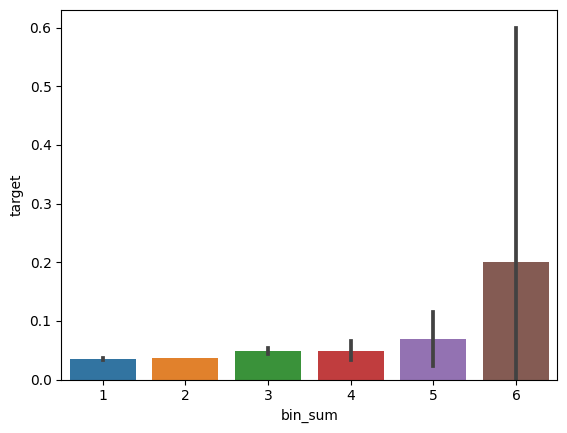

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x='bin_sum', y='target', data=ind_bin_data)

<Axes: xlabel='bin_sum', ylabel='count'>

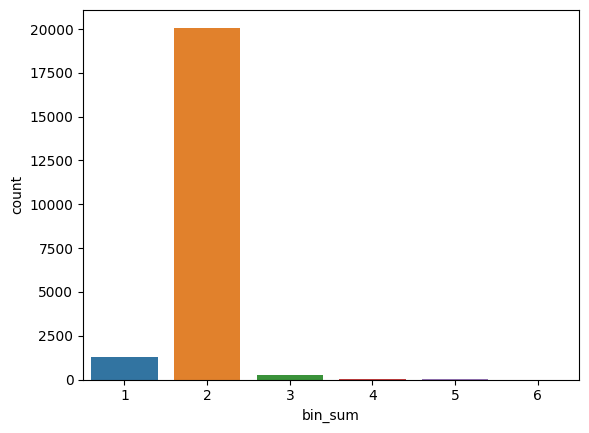

In [40]:
sns.countplot(x='bin_sum', data=ind_bin_data[ind_bin_data['target'] == 1])

<Axes: xlabel='bin_sum', ylabel='count'>

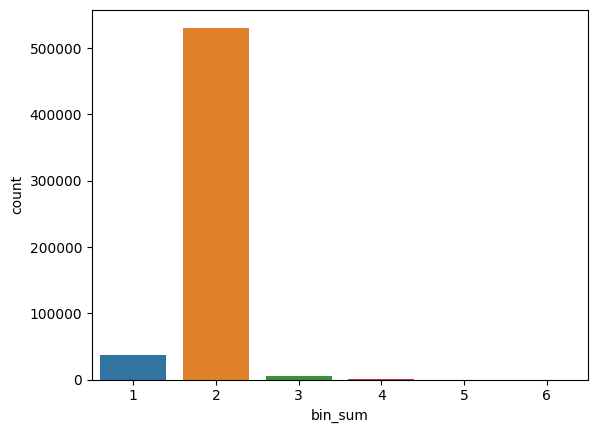

In [41]:
sns.countplot(x='bin_sum', data=ind_bin_data[ind_bin_data['target'] == 0])

In [13]:
all_data = pd.concat([train, test], ignore_index=True)
all_data.drop('target', axis=1)

all_features = all_data.columns

### Derived Features 

What are the possible additional features that can be helpful?